In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [26]:
df_model = pd.read_csv("../inter_data/processed_catboost.csv")
df_model = df_model[[col for col in df_model.columns  if "Unnamed" not in col]]

##  catboost

In [29]:
X = df_model.drop("target", axis=1)
y = df_model["target"]


In [30]:
X.describe()

IsKarvy  total_logins_one_year  total_trades_one_year  \
count  1.529696e+06           1.529696e+06           1.529696e+06   
mean   7.897909e-02           3.322380e-13           5.157499e-14   
std    2.697062e-01           1.000000e+00           1.000000e+00   
min    0.000000e+00          -2.046032e-01          -2.836770e-02   
25%    0.000000e+00          -2.046032e-01          -2.836770e-02   
50%    0.000000e+00          -2.046032e-01          -2.836770e-02   
75%    0.000000e+00          -1.725875e-01          -2.799298e-02   
max    1.000000e+00           1.481090e+02           5.454362e+02   

                THV           ALB           age  months_since_last_login  \
count  1.529696e+06  1.529696e+06  1.529690e+06             1.529696e+06   
mean   1.743543e-13 -8.909296e-15  2.478997e-13            -6.121059e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00             1.000000e+00   
min   -1.172799e-02 -6.436117e+02 -1.516631e+01            -1.051292e+00   
25%   -1.172799e-02 -3.649330e-05 -7.638856e-01            -1.029724e+00   
50%   -1.172799e-02 -3.580469e-05 -2.672504e-01            -4.384402e-01   
75%   -1.172799e-02 -3.477177e-05  5.131762e-01             1.054608e+00   
max    9.162507e+02  1.345829e+02  5.976163e+00             1.054608e+00   

       months_since_last_trade  total_brokerage  years_from_accnt_open  
count             1.529696e+06     1.529696e+06           1.529696e+06  
mean              3.379582e-13     1.100089e-13           2.478403e-12  
std               1.000000e+00     1.000000e+00           1.000000e+00  
min              -1.151324e+00    -5.296256e+01          -7.182294e-01  
25%              -1.125620e+00    -3.579270e-02          -7.182294e-01  
50%               3.191695e-01    -3.579270e-02          -4.163065e-01  
75%               9.924081e-01    -3.579270e-02           1.875393e-01  
max               2.098649e+00     5.185359e+02           2.602922e+00

In [31]:
pd.DataFrame(df_model.nunique()).rename(columns = {0: "num_unique"})

num_unique
cm_cd                       1529696
IncomePA                          6
KRA YN                            2
cm_occup                          6
E2Channel                         6
IsKarvy                           2
IsDormant                         2
target                            2
total_logins_one_year          8310
total_trades_one_year          7385
THV                          134205
ALB                          190176
age                             115
months_since_last_login        2457
months_since_last_trade        2754
total_brokerage              172610
years_from_accnt_open            12

In [39]:

# declaring categorical features for catboost model
cat_features = ["IncomePA", "KRA YN", "cm_occup", "E2Channel", "IsKarvy", "IsDormant"]



In [43]:

# removing client_code
# X = X.drop("cm_cd", axis = 1)
X["IsKarvy"] = X["IsKarvy"].astype(int)


In [101]:
X.to_csv("../inter_data/X_cat.csv")
y.to_csv("../inter_data/y_cat.csv")

In [50]:

# train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In [52]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1223756, 15), (1223756,), (305940, 15), (305940,))

In [55]:

from catboost import CatBoostClassifier



from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(
    iterations=75,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy', 'Recall', "F1"]
)


cat_clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=True,
    plot=True
)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3573632	test: 0.3572763	best: 0.3572763 (0)	total: 299ms	remaining: 22.2s
1:	learn: 0.2302624	test: 0.2301465	best: 0.2301465 (1)	total: 596ms	remaining: 21.7s
2:	learn: 0.1672768	test: 0.1670066	best: 0.1670066 (2)	total: 853ms	remaining: 20.5s
3:	learn: 0.1262618	test: 0.1265537	best: 0.1265537 (3)	total: 1.11s	remaining: 19.7s
4:	learn: 0.1065357	test: 0.1068292	best: 0.1068292 (4)	total: 1.35s	remaining: 19s
5:	learn: 0.0934369	test: 0.0935451	best: 0.0935451 (5)	total: 1.6s	remaining: 18.4s
6:	learn: 0.0867694	test: 0.0869264	best: 0.0869264 (6)	total: 1.84s	remaining: 17.8s
7:	learn: 0.0813697	test: 0.0816017	best: 0.0816017 (7)	total: 2.08s	remaining: 17.4s
8:	learn: 0.0765594	test: 0.0766402	best: 0.0766402 (8)	total: 2.37s	remaining: 17.3s
9:	learn: 0.0725281	test: 0.0726427	best: 0.0726427 (9)	total: 2.69s	remaining: 17.5s
10:	learn: 0.0696984	test: 0.0698395	best: 0.0698395 (10)	total: 2.96s	remaining: 17.2s
11:	learn: 0.0676643	test: 0.0678171	best: 0.0678171 (1

In [56]:

y_train_pred = cat_clf.predict(X_train)
train_result = pd.DataFrame({'Converted':y_train, 'Converted_prob':y_train_pred, "prospect_ID": y_train.index})


Text(0.5, 0, 'False Positive Rate')

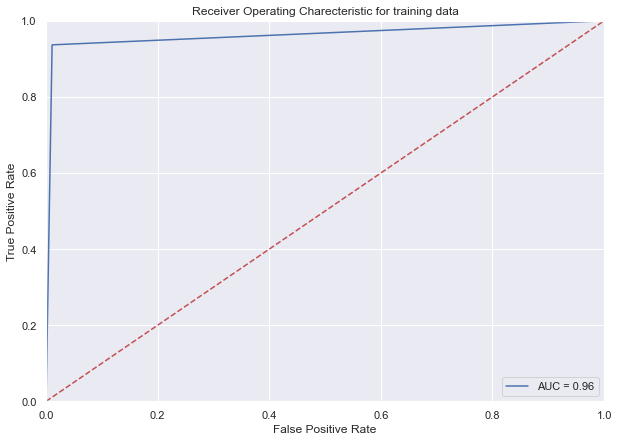

In [58]:

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


Text(0.5, 0, 'False Positive Rate')

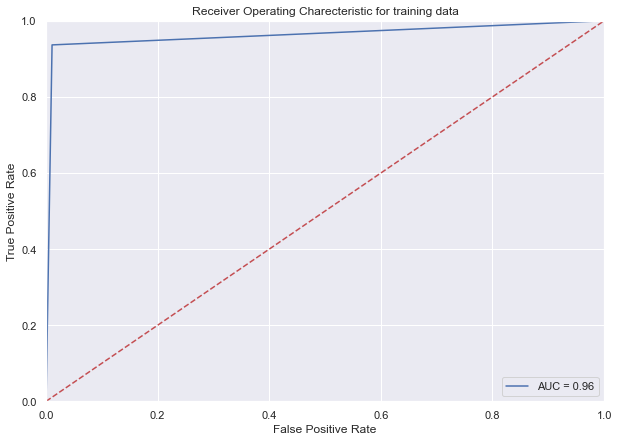

In [81]:

y_val_pred = cat_clf.predict(X_val)
val_result = pd.DataFrame({'Converted':y_val, 'Converted_prob':y_val_pred, "prospect_ID": y_val.index})

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


<AxesSubplot:>

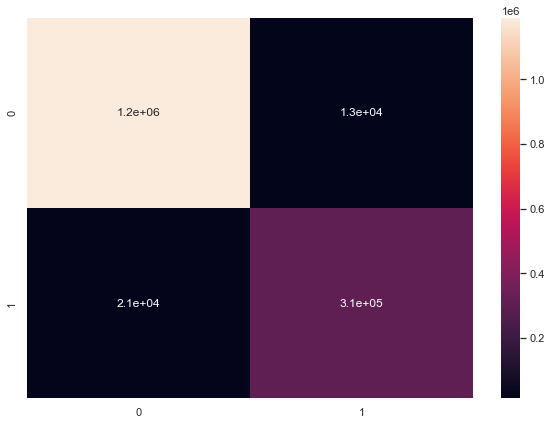

In [64]:
from sklearn.metrics import confusion_matrix
sns.heatmap((confusion_matrix(y, cat_clf.predict(X))), annot = True)

## Predictions

In [104]:
df_post_trade = pd.read_csv("../../../data/clients_trading_post_etf.csv")
df_post_trade = df_post_trade[df_post_trade["ETFDatetime"] > '1910-01-01']
df_post_trade = df_post_trade.sort_values(['trn_date']).drop_duplicates(['Client_Code'], keep='last', ignore_index=True)


probs = cat_clf.predict_proba(X)
df_probs = pd.DataFrame({"true": y, 
                         "probabilities_0": probs[:, 0], 
                         "probabilities_1": probs[:, 1], 
                         "prospect_ID": y.index})


df_probs["client_code"] = df_model[df_model["cm_cd"].index == df_probs["prospect_ID"]]["cm_cd"]

In [106]:
df_post_trade

Client_Code  trn_date              ETFDatetime
0        RAPT1001  20210729  2021-07-26 15:26:29.440
1        JPSINGH1  20210802  2021-07-30 14:45:04.307
2        JAY18199  20210803  2021-07-30 14:45:04.057
3        86527151  20210803  2021-08-02 14:45:33.570
4        82352898  20210803  2021-08-02 14:45:32.307
...           ...       ...                      ...
70361    24833776  20211122  2021-10-20 16:00:58.127
70362    10184JMD  20211122  2021-11-12 16:00:02.630
70363    34877434  20211122  2021-09-09 14:45:19.927
70364    52236113  20211122  2021-11-03 16:01:00.683
70365    KOTESWRB  20211122  2021-09-24 14:50:56.980

[70366 rows x 3 columns]

In [109]:
from datetime import datetime
from datetime import date
now = datetime.now()

In [114]:
df_probs = df_probs[(df_probs["probabilities_1"] > 0.5) & (~df_probs["client_code"].isin(df_post_trade["Client_Code"]))]

date = "{}{:2d}{:2d}".format(now.year, now.month, now.day)
df_probs[["client_code"]].to_csv("../predictions/predictions_{}".format(date))

(272619, 5)

In [65]:
df_model.shape, df_model["target"].value_counts()

((1529696, 17),
 0.0    1203398
 1.0     326298
 Name: target, dtype: int64)

In [67]:
y_train.value_counts(),y_val.value_counts()

(0.0    962986
 1.0    260770
 Name: target, dtype: int64,
 0.0    240412
 1.0     65528
 Name: target, dtype: int64)

In [76]:
try:
    !mkdir ../models
except:
    pass
cat_clf.save_model('../models/catboost_classifier')

The syntax of the command is incorrect.
